# Simulation 

In [1]:
import os
import sys
sys.path.append('..')
from sfp_nsdsyn import simulation as sim
from sfp_nsdsyn import make_dataframes as prep
from sfp_nsdsyn import two_dimensional_model as model
from sfp_nsdsyn import utils as utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [25]:
subj_list = ['subj01','subj02','subj03','subj04','subj05','subj06','subj07','subj08']

params = pd.read_csv('/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/results_2D/nsdsyn/summary/precision_weighted_params.csv')
params = params.query('vroinames == "V1"')
params_dict = params.to_dict(orient='records')[0]

lr=0.0005
max_epoch=20000


In [23]:
scaled_sim = sim.SynthesizeData(roi='V1', n_voxels=2500, precision_weight=True,
                       grating_type='scaled', sample_subj_list=subj_list)
stim_info = scaled_sim.get_stim_info_for_n_voxels()
scaled_syn_data = scaled_sim.add_pRF_info(stim_info)
scaled_syn_data = scaled_sim.add_sigma_v(scaled_syn_data)
scaled_syn_data =scaled_sim.synthesize_BOLD_2d(scaled_syn_data, params=params_dict, model=7)
                                                

In [26]:
my_dataset = model.SpatialFrequencyDataset(scaled_syn_data, beta_col='normed_betas')
my_model = model.SpatialFrequencyModel()
pt_path = '/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/simulation/gratings-scaled.pt'
loss_history, model_history, losses = model.fit_model(my_model, my_dataset,
                                                      save_path=pt_path,
                                                      learning_rate=lr, max_epoch=max_epoch,
                                                      print_every=5000, loss_all_voxels=False)

**epoch no.0 loss: 0.034
**epoch no.4999 loss: 0.002
**epoch no.9999 loss: 0.002
**epoch no.14999 loss: 0.002
**epoch no.19999 loss: 0.002
*epoch no.20000: Finished! final model params...
 {'sigma': 6.71, 'slope': 0.36, 'intercept': -0.16, 'p_1': 0.0, 'p_2': 0.03, 'p_3': 0.09, 'p_4': -0.01, 'A_1': -0.22, 'A_2': -0.09}
Elapsed time: 240.75 sec


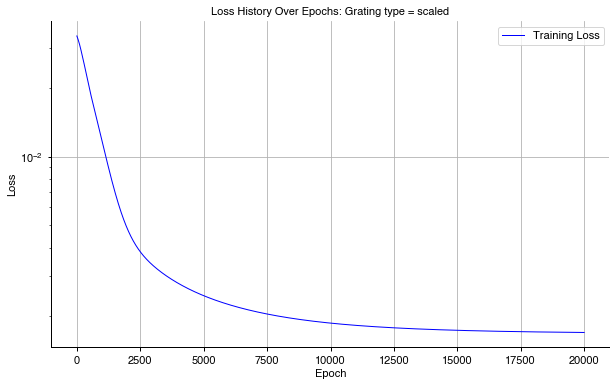

In [27]:
# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history['epoch'], loss_history['loss'], label='Training Loss', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History Over Epochs: Grating type = scaled')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()


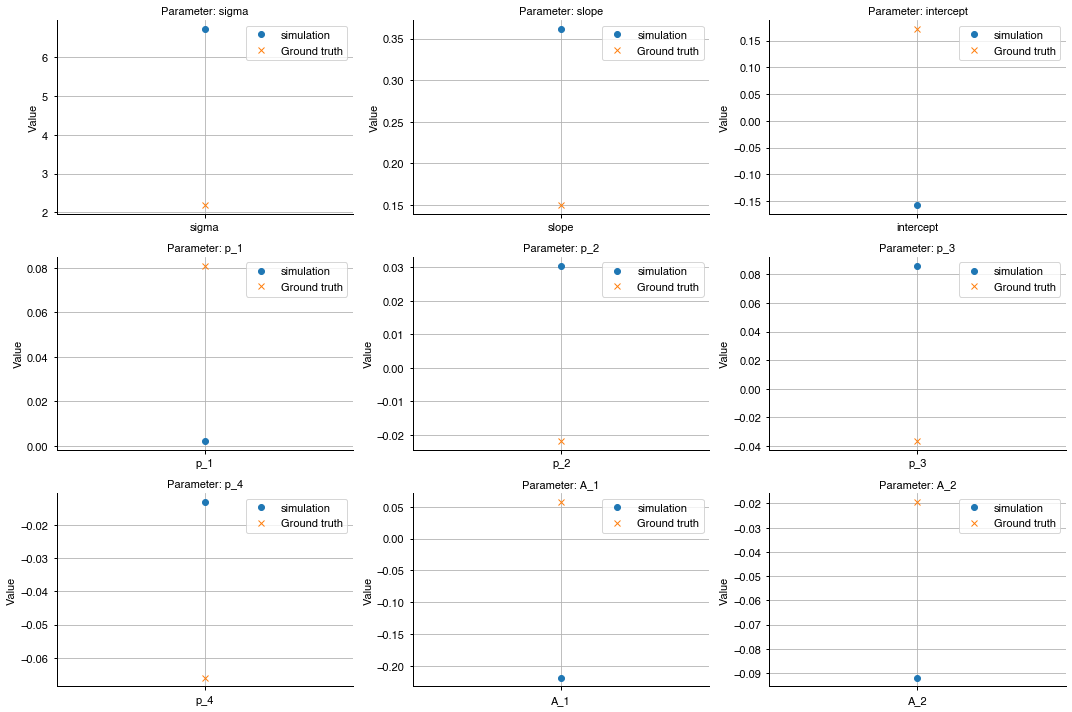

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2
9999,9999,3.623088,0.27392,-0.05036,-0.005288,-0.009753,-0.002091,-0.024264,-0.218531,-0.092105


In [ ]:
# Extract the parameters from model_history for epoch 9999
epoch_9999_params = model_history.query('epoch == @max_epoch-1').iloc[0]

# Extract the parameters from params_dict
params_dict_values = [params_dict[key] for key in ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']]

# Plot each parameter separately in different axes
params = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, param in enumerate(params):
    axes[i].plot([param], [epoch_9999_params[i+1]], label='simulation', marker='o', linestyle='None')
    axes[i].plot([param], [params_dict_values[i]], label='Ground truth', marker='x', linestyle='None')
    axes[i].set_title(f'Parameter: {param}')
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [31]:
constant_sim = sim.SynthesizeData(roi='V1', n_voxels=2500, precision_weight=True,
                       grating_type='constant', sample_subj_list=subj_list)
stim_info = constant_sim.get_stim_info_for_n_voxels()
constant_syn_data = constant_sim.add_pRF_info(stim_info)
constant_syn_data = constant_sim.add_sigma_v(constant_syn_data)
constant_syn_data =constant_sim.synthesize_BOLD_2d(constant_syn_data, params=params_dict, model=7)


In [32]:
my_dataset = model.SpatialFrequencyDataset(constant_syn_data, beta_col='normed_betas')
my_model = model.SpatialFrequencyModel()
pt_path = '/Volumes/server/Projects/sfp_nsd/derivatives/sfp_model/simulation/gratings-constant.pt'
loss_history, model_history, losses = model.fit_model(my_model, my_dataset,
                                                      save_path=pt_path,
                                                      learning_rate=lr, max_epoch=max_epoch,
                                                      print_every=5000, loss_all_voxels=False)

**epoch no.0 loss: 0.044
**epoch no.4999 loss: 0.002
**epoch no.9999 loss: 0.001
**epoch no.14999 loss: 0.001
**epoch no.19999 loss: 0.0
*epoch no.20000: Finished! final model params...
 {'sigma': 5.91, 'slope': 0.0, 'intercept': 0.02, 'p_1': -0.91, 'p_2': -0.64, 'p_3': 0.04, 'p_4': -0.09, 'A_1': -0.16, 'A_2': -0.06}
Elapsed time: 227.16 sec


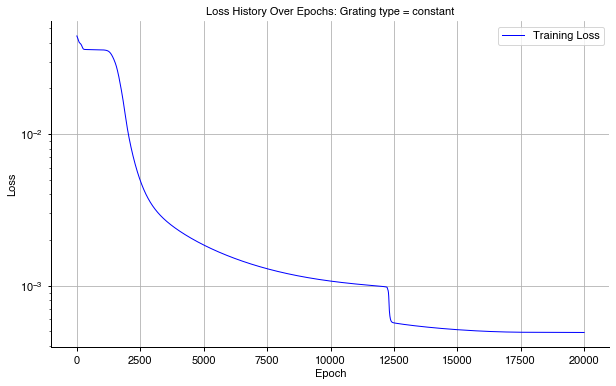

In [33]:
# Plot the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history['epoch'], loss_history['loss'], label='Training Loss', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History Over Epochs: Grating type = constant')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()



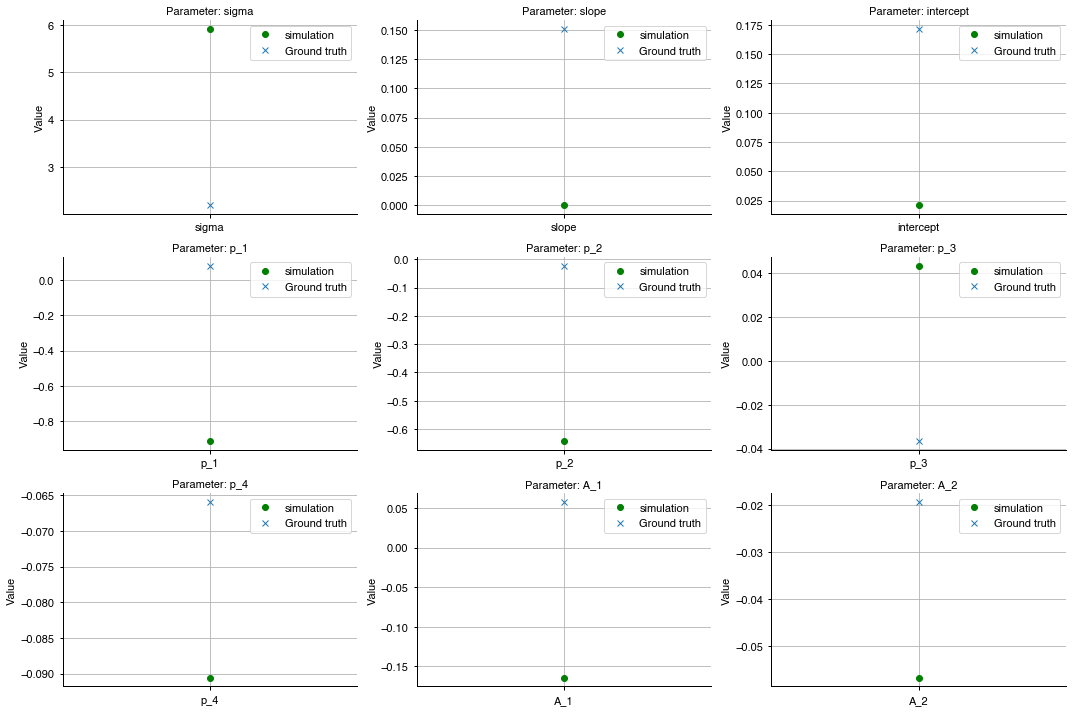

In [35]:
# Extract the parameters from model_history for epoch 9999
epoch_9999_params = model_history.query('epoch == @max_epoch-1').iloc[0]

# Extract the parameters from params_dict
params_dict_values = [params_dict[key] for key in ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']]

# Plot each parameter separately in different axes
params = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, param in enumerate(params):
    axes[i].plot([param], [epoch_9999_params[i+1]], label='simulation', marker='o', color='green', linestyle='None')
    axes[i].plot([param], [params_dict_values[i]], label='Ground truth', marker='x', linestyle='None')
    axes[i].set_title(f'Parameter: {param}')
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Extract the parameters from model_history for epoch 9999
epoch_9999_params = model_history.query('epoch == @max_epoch-1').iloc[0]

# Extract the parameters from params_dict
params_dict_values = [params_dict[key] for key in ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']]

# Plot each parameter separately in different axes
params = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, param in enumerate(params):
    axes[i].plot([param], [epoch_9999_params[i+1]], label='simulation', marker='o', color='green', linestyle='None')
    axes[i].plot([param], [params_dict_values[i]], label='Ground truth', marker='x', linestyle='None')
    axes[i].set_title(f'Parameter: {param}')
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()
